In [2]:
import os
import zipfile
import keras.preprocessing
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf 
import numpy as np

2023-11-04 15:31:39.942493: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
Training_Directory = 'archive/img/'


#################################    image data generator   ##########################################

Training_data_generator = ImageDataGenerator(rescale=1./255,
                                             rotation_range=40,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True,
                                             fill_mode='nearest'
                                             )


Training_Data = Training_data_generator.flow_from_directory(
                                                            Training_Directory,
                                                            target_size=(200,200),
                                                            class_mode='categorical',
                                                            batch_size=128)

#################################    image data generator   ##########################################

Found 10811 images belonging to 4 classes.


In [4]:
Validation_Directory = "/Users/zubair/Desktop/MyModel/archive/val/"

Validation_Data_Generator = ImageDataGenerator(rescale=1./255)

Validation_Data = Validation_Data_Generator.flow_from_directory(

                                                    Validation_Directory,
                                                    target_size=(200,200),
                                                    class_mode='categorical',
                                                    batch_size=128)

Found 678 images belonging to 4 classes.


In [6]:

"""

now the data is almost ready to be fed, but first we would need a convultion mdoel

"""

#################################    Creating the Model   ##########################################

""" first create the convultional model and set the maxpooling """

model = tf.keras.models.Sequential([

                tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(200, 200, 3)),
                tf.keras.layers.MaxPooling2D(2,2),


                tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),


                tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),

                tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),

                tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),

                tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),

                tf.keras.layers.Flatten(),
                tf.keras.layers.Dropout(0.3),
                
                tf.keras.layers.Dense(256, activation='relu'),
                tf.keras.layers.Dense(256, activation='relu'),
                tf.keras.layers.Dense(256, activation='relu'),
                tf.keras.layers.Dense(256, activation='relu'),
                tf.keras.layers.Dense(256, activation='relu'),
                tf.keras.layers.Dense(256, activation='relu'),

                tf.keras.layers.Dense(4, activation='softmax')
    
])

model.summary()

#################################    Creating the Model   ##########################################


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 99, 99, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 23, 23, 128)      

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=['accuracy'])

In [8]:
"""
now fitting the model and predicting
"""

#################################    fitting and evaluating   ##########################################


model.fit(Training_Data, epochs=1500,steps_per_epoch=5, validation_data=Validation_Data, verbose=1, validation_steps=3)

model.save("my_model3.keras")




#################################    fitting and evaluating   ##########################################

Epoch 1/1500
5/5 [==============================] - 32s 6s/step - loss: 2.2269 - accuracy: 0.4062 - val_loss: 1.3756 - val_accuracy: 0.3125
Epoch 2/1500
5/5 [==============================] - 34s 7s/step - loss: 1.3455 - accuracy: 0.4531 - val_loss: 1.3591 - val_accuracy: 0.3229
Epoch 3/1500
5/5 [==============================] - 30s 6s/step - loss: 1.2880 - accuracy: 0.4484 - val_loss: 1.5489 - val_accuracy: 0.3151
Epoch 4/1500
5/5 [==============================] - 28s 6s/step - loss: 1.3142 - accuracy: 0.4344 - val_loss: 1.3790 - val_accuracy: 0.3073
Epoch 5/1500
5/5 [==============================] - 29s 6s/step - loss: 1.2877 - accuracy: 0.4328 - val_loss: 1.4675 - val_accuracy: 0.3125
Epoch 6/1500
5/5 [==============================] - 28s 5s/step - loss: 1.2957 - accuracy: 0.4328 - val_loss: 1.3708 - val_accuracy: 0.3177
Epoch 7/1500
5/5 [==============================] - 28s 5s/step - loss: 1.2636 - accuracy: 0.4594 - val_loss: 1.3987 - val_accuracy: 0.3203
Epoch 8/1500
5/5 [==

1/1 [==============================] - 0s 154ms/step
[[0. 0. 1. 0.]]
[[[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  ...

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]]]


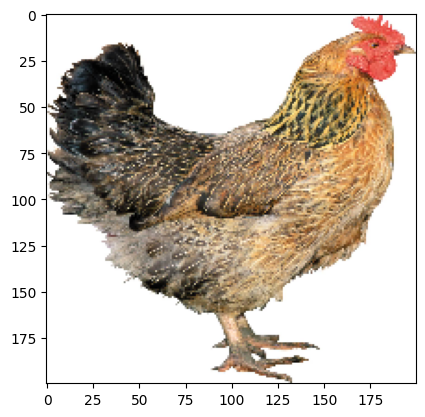

In [26]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
img = image.load_img('/Users/zubair/Downloads/uuu.jpeg', target_size=(200 , 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=32)
print(classes)
print(x)
plt.imshow(img)
plt.show()